# Timing statistics

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [58]:
table = pd.read_json("recontiming128-1024.json", orient="index")
table.head()

,data,timing
2021-01-28 07:42:51,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3639, 'MorphSpotClean': 646..."
2021-01-28 07:43:14,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.4258, 'MorphSpotClean': 749..."
2021-01-28 07:43:37,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 14.28, 'MorphSpotClean': 770.8..."
2021-01-28 07:44:00,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.6156, 'MorphSpotClean': 834..."
2021-01-28 07:44:22,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3923, 'MorphSpotClean': 705..."


In [59]:
table['timing']['2021-01-28 07:42:51']

{'FullLogNorm': 13.3639,
 'MorphSpotClean': 646.812,
 'Multi projection BP parallel': 593.953,
 'WaveletRingClean': 10621.2,
 'total': 29585}

In [60]:
table['total']=np.nan
table['Time/slice']=np.nan
table['size']=np.nan
table['Total GUPS']=np.nan
table['GUPS/slice']=np.nan
table['FullLogNorm']=np.nan
table['MorphSpotClean']=np.nan
table['WaveletRingClean']=np.nan
table['Multi projection BP parallel']=np.nan


for ind in table.index: 
    table['Total time'][ind] = table['timing'][ind]['total'] 
    datadict = table['data'][ind] 
    sum=1
    for key in datadict :
        sum = sum * datadict[key]
        
    timingdict = table['timing'][ind]
    for key in timingdict :
        table[key][ind]=timingdict[key]

        

    table['size'][ind]       = datadict['sizeu']  
    table['Time/slice'][ind] = table['Total time'][ind]/datadict['sizeu'] 
    table['Total GUPS'][ind] = sum/table['Total time'][ind]/1e9
    table['GUPS/slice'][ind] = table['Total GUPS'][ind]/datadict['sizez']**2
        

KeyError: 'Total time'

In [61]:
table.head()

,data,timing,total,Time/slice,size,Total GUPS,GUPS/slice,FullLogNorm,MorphSpotClean,WaveletRingClean,Multi projection BP parallel
2021-01-28 07:42:51,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3639, 'MorphSpotClean': 646...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-28 07:43:14,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.4258, 'MorphSpotClean': 749...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-28 07:43:37,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 14.28, 'MorphSpotClean': 770.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-28 07:44:00,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.6156, 'MorphSpotClean': 834...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-28 07:44:22,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3923, 'MorphSpotClean': 705...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
sizes = []
avgTotalTime = []
stdTotalTime = []
avgSliceTime = []
stdSliceTime = []
avgGUPS = []
avgNorm = []
avgSpot = []
avgRing = []
avgBP   = []
avgOther = []

scale = 1000
for s in table['size'].unique() :
    sizes.append(int(s))
    avgTotalTime.append(table[table['size']==s]['total'].mean()/scale)
    stdTotalTime.append(table[table['size']==s]['total'].std()/scale)
    avgSliceTime.append(table[table['size']==s]['Time/slice'].mean()/scale)
    stdSliceTime.append(table[table['size']==s]['Time/slice'].std()/scale)
    avgGUPS.append(table[table['size']==s]['Total GUPS'].mean())
    avgNorm.append(table[table['size']==s]['FullLogNorm'].mean()/scale)
    avgSpot.append(table[table['size']==s]['MorphSpotClean'].mean()/scale)
    avgRing.append(table[table['size']==s]['WaveletRingClean'].mean()/scale)
    avgBP.append(table[table['size']==s]['Multi projection BP parallel'].mean()/scale)
    avgOther.append(avgTotalTime[-1]
                    -avgNorm[-1]
                    -avgSpot[-1]
                    -avgRing[-1]
                    -avgBP[-1])

data = {'size': sizes, 
        'Total time': avgTotalTime, 
        'std Total time': stdTotalTime, 
        'Time/slice': avgSliceTime, 
        'std Time/slice': stdSliceTime,
        'GUPS': avgGUPS,
        'Normalization': avgNorm,
        'Spot cleaning': avgSpot,
        'Ring cleaning': avgRing,
        'Back projection': avgBP,
        'Others': avgOther}

timings = pd.DataFrame.from_dict(data).sort_values('size')

ValueError: cannot convert float NaN to integer

In [63]:
timings

,size,Total time,std Total time,Time/slice,std Time/slice,GUPS,Normalization,Spot cleaning,Ring cleaning,Back projection,Others
1,128,7.355198,0.151263,0.057462,0.001182,0.598168,0.002196,0.104239,2.109821,0.069484,5.069458
0,256,23.413110,2.170190,0.091457,0.008477,12.097935,0.014137,0.736803,10.624140,0.588439,11.449591
2,384,52.600370,0.277105,0.136980,0.000722,60.955011,0.046760,2.262504,30.065500,2.505755,17.719851
3,512,102.467200,0.478118,0.200131,0.000934,175.809915,0.099216,5.116354,65.348400,6.233049,25.670181
4,768,292.040600,1.068126,0.380261,0.001391,702.634238,0.330046,16.661500,199.304600,29.975090,45.769365
5,1024,645.552667,4.235750,0.630423,0.004136,1785.996360,0.746305,38.268400,455.253333,79.560500,71.724128


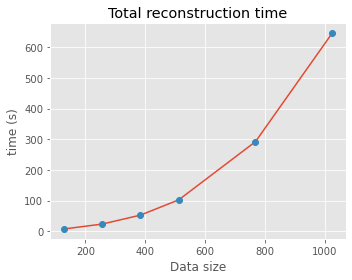

In [64]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Total time'])
plt.plot(timings['size'],timings['Total time'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Total reconstruction time');
plt.tight_layout()
plt.savefig('totaltime.svg')
plt.savefig('totaltime.png',dpi=300)

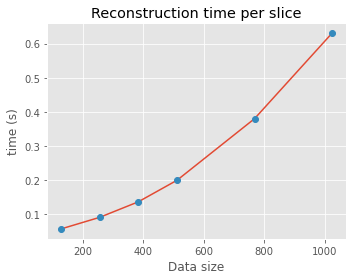

In [65]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

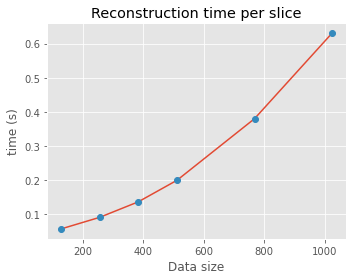

In [66]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

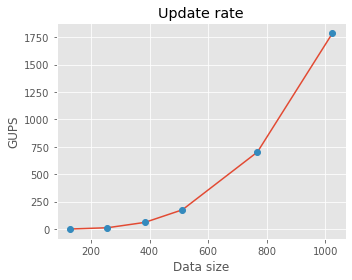

In [67]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['GUPS'])
plt.plot(timings['size'],timings['GUPS'],'o')
plt.xlabel('Data size')
plt.ylabel('GUPS')
plt.title('Update rate');
plt.tight_layout()
plt.savefig('GUPS.svg')
plt.savefig('GUPS.png',dpi=300)

<Figure size 360x360 with 0 Axes>

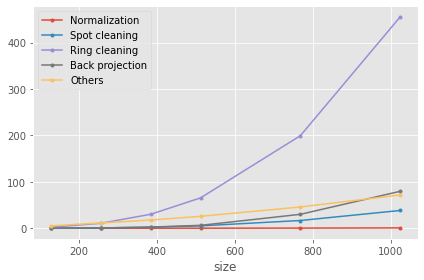

In [68]:
plt.figure(figsize=(5,5))
timings.plot('size',['Normalization','Spot cleaning','Ring cleaning','Back projection','Others'],style='.-')
plt.tight_layout()

<Figure size 360x360 with 0 Axes>

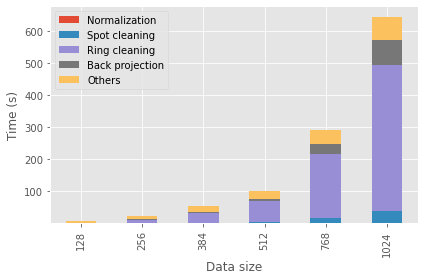

In [69]:
plt.figure(figsize=(5,5))
timings.plot.bar('size',['Normalization','Spot cleaning','Ring cleaning','Back projection','Others'],stacked=True)
plt.xlabel('Data size')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('timepertask.svg')
plt.savefig('timepertask.png',dpi=300)